# Linear Regression

In [370]:
import pandas as pd                 #importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [371]:
car_data=pd.read_csv(r"C:\Users\DELL\Downloads\car_age_price.csv")   #Data Exploration

In [372]:
car_data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [373]:
car_data.shape

(112, 2)

In [374]:
car_data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [375]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


Text(0.5, 1.0, 'Price of Car v/s Year')

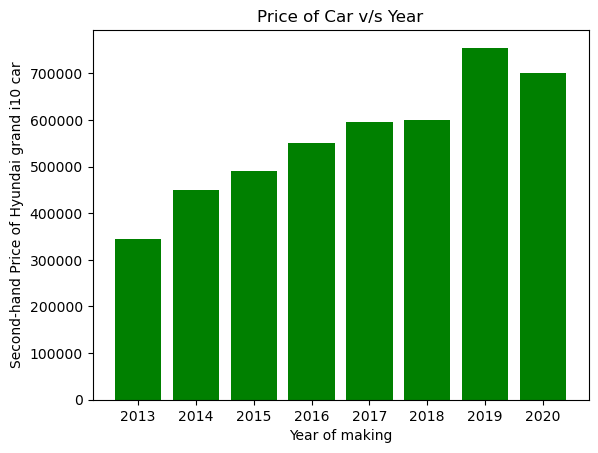

In [376]:
plt.bar(car_data['Year'],car_data['Price'],color='green')
plt.xlabel("Year of making")
plt.ylabel("Second-hand Price of Hyundai grand i10 car")
plt.title("Price of Car v/s Year")

In [377]:
car_data.isna().sum()                  #checking if there is any null values

Year     0
Price    0
dtype: int64

In [378]:
car_data.columns                #Columns in the dataset

Index(['Year', 'Price'], dtype='object')

<Axes: >

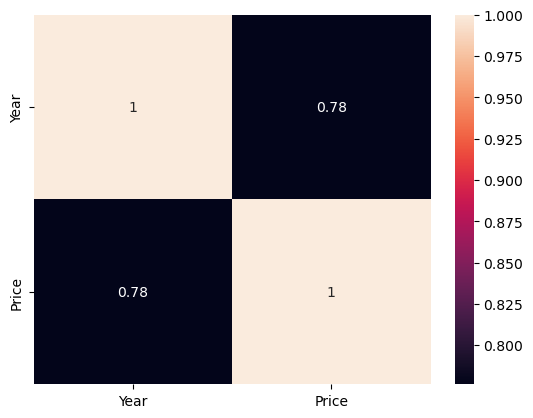

In [379]:
corrmatrix=car_data.corr()             #Finding the correlation between the 2 variables.
sns.heatmap(corrmatrix,annot=True)

We can see that,there is a high correlation between the variables 'Year' and 'Price'.


In [380]:
y=car_data['Price']                           #independent and dependent variables are defined
x=car_data.drop(['Price'],axis=1)             #Here,'Price' is the dependent variable and 'Year' is the independent variable.

In [381]:
y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [382]:
x.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [383]:
from sklearn.model_selection import train_test_split

In [384]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=40)     #splitting the data for testing
#Here,training set has 80% of the data and the test set has 20% of the data.

In [385]:
x_train,x_test

(    Year
 45  2018
 39  2020
 38  2018
 62  2017
 32  2017
 ..   ...
 56  2014
 37  2017
 7   2017
 91  2017
 70  2015
 
 [89 rows x 1 columns],
      Year
 48   2016
 72   2015
 80   2015
 77   2015
 17   2017
 29   2017
 47   2018
 2    2019
 111  2015
 64   2015
 23   2017
 4    2018
 98   2020
 16   2017
 40   2019
 42   2018
 76   2015
 81   2014
 11   2018
 15   2017
 82   2015
 85   2015
 51   2018)

In [386]:
y_train,y_test

(45    450000
 39    545000
 38    475000
 62    540000
 32    550000
        ...  
 56    341000
 37    486000
 7     575000
 91    520000
 70    450000
 Name: Price, Length: 89, dtype: int64,
 48     396000
 72     300000
 80     390000
 77     325000
 17     550000
 29     550000
 47     450000
 2      700000
 111    425000
 64     490000
 23     550000
 4      465000
 98     700000
 16     500000
 40     525000
 42     550000
 76     450000
 81     390000
 11     500000
 15     500000
 82     390000
 85     320000
 51     550000
 Name: Price, dtype: int64)

In [387]:
from sklearn.linear_model import LinearRegression     #importing the library for Linear Regression

In [388]:
lr=LinearRegression()

In [389]:
model=lr.fit(x_train,y_train)                    #Fitting the linear regression model

In [390]:
y_pred=model.predict(x_test)

In [391]:
y_pred                    #Predicting the values

array([457777.2114885 , 416363.45852979, 416363.45852979, 416363.45852979,
       499190.96444723, 499190.96444723, 540604.71740595, 582018.47036467,
       416363.45852979, 416363.45852979, 499190.96444723, 540604.71740595,
       623432.22332339, 499190.96444723, 582018.47036467, 540604.71740595,
       416363.45852979, 374949.70557106, 540604.71740595, 499190.96444723,
       416363.45852979, 416363.45852979, 540604.71740595])

In [392]:
y_pred,y_test

(array([457777.2114885 , 416363.45852979, 416363.45852979, 416363.45852979,
        499190.96444723, 499190.96444723, 540604.71740595, 582018.47036467,
        416363.45852979, 416363.45852979, 499190.96444723, 540604.71740595,
        623432.22332339, 499190.96444723, 582018.47036467, 540604.71740595,
        416363.45852979, 374949.70557106, 540604.71740595, 499190.96444723,
        416363.45852979, 416363.45852979, 540604.71740595]),
 48     396000
 72     300000
 80     390000
 77     325000
 17     550000
 29     550000
 47     450000
 2      700000
 111    425000
 64     490000
 23     550000
 4      465000
 98     700000
 16     500000
 40     525000
 42     550000
 76     450000
 81     390000
 11     500000
 15     500000
 82     390000
 85     320000
 51     550000
 Name: Price, dtype: int64)

In [393]:
from sklearn.metrics import mean_squared_error,r2_score

In [394]:
print(mean_squared_error(y_test,y_pred))              #Calculating the mean square error and r2 value.
print(r2_score(y_test,y_pred))

3902822923.307624
0.6303199952962191


In [395]:
a=model.predict([[2022]])                 #predicting the price of the car in the year 2022.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [396]:
a

array([706259.72924083])

The price of the car in the year 2022 is predicted as Rs.706260 approximately.The mean square error is obtained as 3902822923.307624 and the r-square value is obtained as 0.6303199952962191.

# Lasso Regression

In [397]:
import numpy as np                 #importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [398]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\car_age_price.csv")   #Data exploration

In [399]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [400]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [402]:
df.shape

(112, 2)

In [403]:
Y=car_data['Price']                           #defining the dependent and independent variables.
X=car_data.drop(['Price'],axis=1)             #Here,'Price' is the dependent variable and 'Year' is the independent variable

In [404]:
Y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [405]:
X.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [406]:
from sklearn.model_selection import train_test_split

In [407]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=40)    #splitting the data for training
#Here,training set has 80% of the data and the test set has 20% of the data.

In [408]:
X_train,X_test

(    Year
 45  2018
 39  2020
 38  2018
 62  2017
 32  2017
 ..   ...
 56  2014
 37  2017
 7   2017
 91  2017
 70  2015
 
 [89 rows x 1 columns],
      Year
 48   2016
 72   2015
 80   2015
 77   2015
 17   2017
 29   2017
 47   2018
 2    2019
 111  2015
 64   2015
 23   2017
 4    2018
 98   2020
 16   2017
 40   2019
 42   2018
 76   2015
 81   2014
 11   2018
 15   2017
 82   2015
 85   2015
 51   2018)

In [409]:
Y_train,Y_test

(45    450000
 39    545000
 38    475000
 62    540000
 32    550000
        ...  
 56    341000
 37    486000
 7     575000
 91    520000
 70    450000
 Name: Price, Length: 89, dtype: int64,
 48     396000
 72     300000
 80     390000
 77     325000
 17     550000
 29     550000
 47     450000
 2      700000
 111    425000
 64     490000
 23     550000
 4      465000
 98     700000
 16     500000
 40     525000
 42     550000
 76     450000
 81     390000
 11     500000
 15     500000
 82     390000
 85     320000
 51     550000
 Name: Price, dtype: int64)

In [410]:
from sklearn.linear_model import Lasso       #importing library for Lasso regression

In [411]:
lasso=Lasso(alpha=1)                          #Fitting the model using Lasso Regression
model_lasso=lasso.fit(X_train,Y_train)
Y_pred=lasso.predict(X_test)                  #Predicting the values

In [412]:
Y_pred,Y_test

(array([457777.46839219, 416364.09650727, 416364.09650727, 416364.09650727,
        499190.84027712, 499190.84027712, 540604.21216203, 582017.58404696,
        416364.09650727, 416364.09650727, 499190.84027712, 540604.21216203,
        623430.95593189, 499190.84027712, 582017.58404696, 540604.21216203,
        416364.09650727, 374950.72462235, 540604.21216203, 499190.84027712,
        416364.09650727, 416364.09650727, 540604.21216203]),
 48     396000
 72     300000
 80     390000
 77     325000
 17     550000
 29     550000
 47     450000
 2      700000
 111    425000
 64     490000
 23     550000
 4      465000
 98     700000
 16     500000
 40     525000
 42     550000
 76     450000
 81     390000
 11     500000
 15     500000
 82     390000
 85     320000
 51     550000
 Name: Price, dtype: int64)

In [413]:
from sklearn.metrics import mean_squared_error,r2_score

In [414]:
print(mean_squared_error(Y_pred,Y_test))    #Finding the error values
print(r2_score(Y_pred,Y_test))

3902842874.2561088
0.14502601577391672


In [415]:
lasso_coeff=pd.DataFrame()

In [416]:
lasso_coeff["Columns"]=X_train.columns

In [417]:
lasso_coeff['Coefficient Estimate']=pd.Series(lasso.coef_)

In [418]:
print(lasso_coeff)

  Columns  Coefficient Estimate
0    Year          41413.371885


In [419]:
b=model_lasso.predict([[2022]])     #Predicting the value of the car in the year 2022.

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [420]:
print(b)

[706257.69970173]


The mean squared error is obtained as 3902842874.2561088 and the r-square value is obtained as 0.14502601577391672 using Lasso Regression.

The price of the car in the year 2022 is predicted as Rs.706258 approximately.

Here,we can see that there is no much difference between the prices predicted by both lasso regression and linear regression.
Mean squared error is also somewhat same for both the models.

But the r-squared value has significant difference between them.Linear regression model has an r-squared value of 0.63 and the Lasso Regression model has r-square value as 0.145.Higher the R-square value,better the model fits your data.Therefore,the best model is fitted using Linear Regression.